In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [10]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
SERVERFOLDER = os.path.join(cfg.path.server, r'conicalNozzle')
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['orig', 'horizontal', 'speed_sweep', 'visc_speed']]

# Generating Files

In [142]:
import pandas as pd
o = []
for topfolder in [SERVERFOLDER]:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\legend_mesh.csv')

In [5]:
import pandas as pd
o = []
for topfolder in [r'C:\Users\lmf1\Documents\OpenFOAM\conical']:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_speed_rhe_angle.csv'))

In [117]:
fs.addUnitsToLegend(os.path.join(TOPFOLDERS[3], 'cn151'))

INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\visc_speed\cn151\geometry.csv
INFO:root:Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\visc_speed\cn151\geometry.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\visc_speed\cn151\legend.csv


In [118]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in fp.caseFolders(topfolder):
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv'))

In [33]:
for topfolder in [SERVERFOLDER]:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

INFO:root:\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn0hor
INFO:root:No slices recorded in \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn0hor
INFO:root:\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101
INFO:root:    Exported \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101\sliceSummaries.csv
INFO:root:    Exported \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101\steadyTimes.csv
INFO:root:    Exported \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101\steadyPositions.csv
INFO:root:\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn102
INFO:root:No slices recorded

# Plots

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\arean_vertdispn_aspectratio_speeddecay_orig_


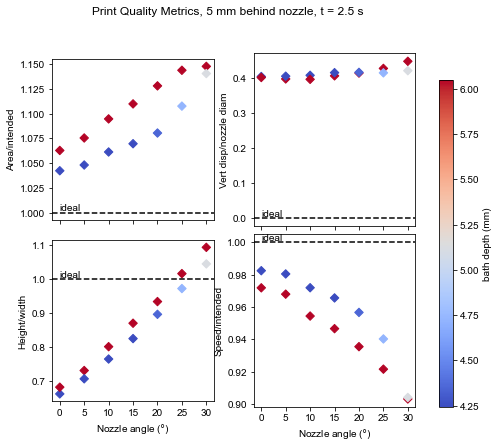

In [81]:
time = 2.5
x = 5
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
for TOPFOLDER in [TOPFOLDERS[0]]:
    qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels, overwrite=True, cvar='bath_depth')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\names_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\runtime_orig_xvar_nozzle_angle_yvar_bath_depth


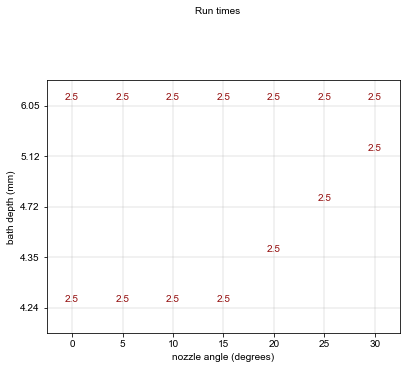

In [120]:
xvar = 'nozzle_angle'
yvar = 'bath_depth'
for TOPFOLDER in [TOPFOLDERS[0]]:
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\xs_5_t_2.5_orig_xvar_nozzle_angle_yvar_bath_depth


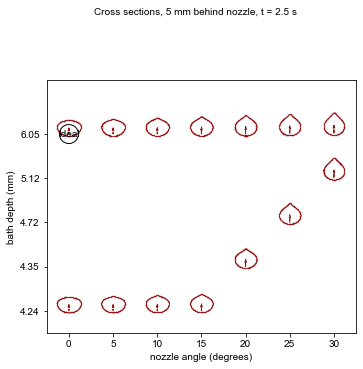

In [106]:
t = 2.5
xposition = 5
xvar = 'nozzle_angle'
yvar = 'bath_depth'
sigma = [0]
for TOPFOLDER in [TOPFOLDERS[0]]:
    XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, sigma, xvar=xvar, yvar=yvar, overwrite=True, adjustBounds=True)

In [107]:
t = 2.5
xposition = 2
xvar = 'vsup'
yvar = 'nozzle_angle'
sigma = [0]
xlist = [y]
for TOPFOLDER in [os.path.join(SERVERFOLDER, 'speed_sweep')]:
    XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, sigma, xvar=xvar, yvar=yvar, nozzleAnglelist=[0], overwrite=True, adjustBounds=True)

TypeError: '<' not supported between instances of 'str' and 'float'

In [82]:
t = 2.5
xvar = 'nozzle_angle'
yvar = 'bath_depth'
sigma = 0
TOPFOLDER = TOPFOLDERS[0]
# for ta in ['y_viscy', 'x_viscx', 'y_uslicey', 'x_uslicex', 'y_shearStressy', 'x_shearStressx']:
for TOPFOLDER in [TOPFOLDERS[0]]:
    for ta in ['y_viscy', 'x_viscx', 'y_umag']:
        picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta
                  , xvar=xvar, yvar=yvar, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_viscy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_x_viscx_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_umag_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth


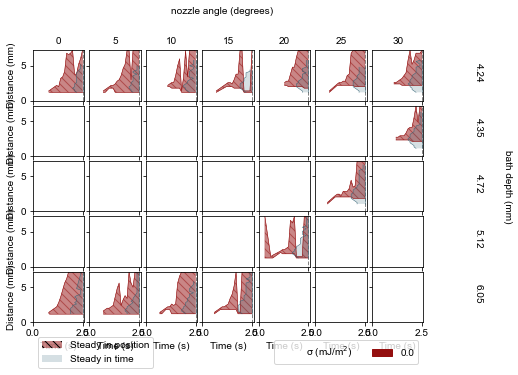

In [147]:
xvar = 'nozzle_angle'
yvar = 'bath_depth'
x = [0,5,10,15,20,25,30]
y = []
sigma = 0
imsize=1
TOPFOLDER = TOPFOLDERS[0]
steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar
            , overwrite=True)

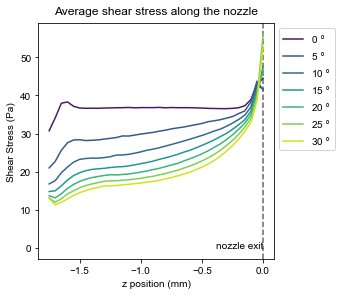

In [254]:
TOPFOLDER = TOPFOLDERS[0]
shearStressPlots0(TOPFOLDER, EXPORTFOLDER, 2.5, overwrite=True)